<a href="https://colab.research.google.com/github/ckalibsnelson/Global-Master-in-Business-Analytics-and-Big-Data/blob/master/Group_B_Cleaning_Data_and_Developing_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Summary

For this project, Group B (Albin S., Jorge R., Daniel B., Nico G., Tomas F., & Ckalib N.) used Pandas, Matplotlib, and Sklearn to complete the following items on the Risk and Fraud dataset:


*   Exploratory Data Analysis
*   Data Cleaning and Preparation
*   Preprocessing
*   Modeling

#Video Summary

Please refer to the following [link](https://drive.google.com/file/d/1aCnTiDkam545fVvELSEyuqqElktRRAxq/view?usp=sharing) for our video, which discusses the following:

*   A quick explanation of Pandas, Matplotlib and Sklearn, specially including their histories. (less than a minute)
*   A quick Exploratory Data Analysis of the data set used
*   Using the EDA, explain the problems of data quality in this data set
*   Research about data preparation with Python. Propose and implement ways to clean, input missing and prepare the data for modelling
*   Development of two Regression models using rbaValue as target variable
*   Development of two binary Classification models using Risk_Description. Setting Risk_Description = Low as 0 and else 1 (Medium or High)

Before we jump too far ahead, let's first understand what Pandas, Matplotlib, and Sklearn are!





#Introduction: Python Libraries

##What is Pandas?

Pandas is a python library that gives you a set of tools to do a data analysis: load, prepare, manipulate, model, and analyze. If you're data requires any sort of analysis, you'll have to know Pandas!

[Python For Data Science Cheat Sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/PandasPythonForDataScience+(1).pdf)

![picture](https://drive.google.com/uc?export=view&id=1Ls3hIGfa8j96D4hyRUSkzZ_rLM8WnhgP)

The most popular item within the Pandas library is the dataframe - a powerful data structure! A Series is essentially a column, and a DataFrame is a multi-dimensional table made up of a collection of Series.

![picture](https://drive.google.com/uc?export=view&id=1X7fbHpnN0zZxV78gXJXNit3JQFdOiO59)


##What is Matplotlib?

Matplotlib is a python 2D and 3D plotting library for data visualization and creating interactive graphics and plots!

[Matplotlib Cheat Sheet](https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.datacamp.com%2Fcommunity%2Fblog%2Fpython-matplotlib-cheat-sheet&psig=AOvVaw0BZ_fJdeUs069SbfzlChx2&ust=1599536968444000&source=images&cd=vfe&ved=0CA0QjhxqFwoTCIiZx9iR1usCFQAAAAAdAAAAABAD)

![picture](https://drive.google.com/uc?export=view&id=1NWgEpgvux6Ue8R8Hu5r5-DstMW7vfO4H)

Matplotib Visualizations
![picture](https://drive.google.com/uc?export=view&id=14eU1G3PNU_Qw4A7WQpePgms61CceTQ0S)

##What is Sklearn?

Scikit-Learn, or Sklearn, is a python machine learning library. There's a rich suite of tools that allow you to load datasets, manipulate datasets, and preprocess pipelines and metrics. The best part of Sklearn is the vast collection of machine learning algorithms that require minimal code adjustments!

![picture](https://drive.google.com/uc?export=view&id=1AKo4I8jajputrH1zaRzwxYej2t4CI3iP)

Now, let's jump into our initial Exploratory Data Analysis!

#Import dataset

In [ ]:
#Let's make sure we import pandas and numpy first. We will import sklearn later!
import pandas as pd
import numpy as np

In [ ]:
#To upload from your local drive, start with the following code:
from google.colab import files
uploaded = files.upload()
#It will prompt you to select a file. Click on “Choose Files” then select and upload the file. Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.

Saving RBA_KYC_Accounts_ALL_Ids.xlsx to RBA_KYC_Accounts_ALL_Ids.xlsx


In [ ]:
#Finally, type in the following code to import it into a dataframe (make sure the filename matches the name of the uploaded file).
import io
df = pd.read_excel(io.BytesIO(uploaded['RBA_KYC_Accounts_ALL_Ids.xlsx']))
# Dataset is now stored in a Pandas Dataframe

#Exploratory Data Analysis


In [ ]:
#first 5 rows
df.head()

,org_code,branchCode,customerId,fullaccount,customerType,creationDate,onboarding,residentStatus,residentCountry,nationalityOriginal,extraNationality,dateOfBirth,age_in_year,birthCountry,birthPlace,profession,companyType,giinCode,lastUpdate,status,ledgerCode,accountCurrency,jointAccount,IsBlackListed,CUS_CLASS,ECO_SEC,TYPE_OF_DEP,GENDER,LEGAL_STA_CODE,legal_Stat_desc,avg_last_10_days,avg_last_30_days,avg_last_90_days,number_of_cash_dep_90_days,avg_cash_deposit_90_days,number_of_deposit_90_days,avg_of_dep_90_days,number_of_cash_wd_90_days,avg_of_cash_wd_90_days,number_of_wd_90_days,avg_of_wd_90_days,date_of_assessment,rbaGradeAbrv,rba_grade_desc,score_card,score_card_Desc,rbaValue
0,1,201,20100400550000072,020100400550015817000,2,2015-04-05,N,1,JO,JO,NaN,NaN,NaN,NaN,NaN,NaN,35.0,NaN,NaN,Active,5817,JOD,0,0,4,46,35,NaN,2.0,NaN,8610000.00,2170000.00,23333.33,0,0.0,0,0.0,0,0.0,0,0.0,2019-01-24,L,Low,E-Existing,NaN,13.20
1,1,202,20200207860000638,020200207860011330000,1,2013-09-17,N,1,JO,JO,NaN,1989-06-30,30.0,NaN,????,27.0,NaN,NaN,NaN,Active,1330,JOD,0,0,2,90,23,2.0,1.0,NaN,0.00,0.00,0.00,0,0.0,0,0.0,0,0.0,0,0.0,2019-01-24,L,Low,I-Existing,NaN,16.93
2,1,202,20200207860000638,020200207860011389002,1,2013-09-17,N,1,JO,JO,NaN,1989-06-30,30.0,NaN,????,27.0,NaN,NaN,NaN,Active,1389,JOD,0,0,2,90,23,2.0,1.0,NaN,-137562.72,-34672.52,-369.81,0,0.0,0,0.0,0,0.0,0,0.0,2019-01-24,L,Low,I-Existing,NaN,16.93
3,1,202,20200207860000638,020200207860010060000,1,2013-09-17,N,1,JO,JO,NaN,1989-06-30,30.0,NaN,????,27.0,NaN,NaN,NaN,Active,60,JOD,0,0,2,90,23,2.0,1.0,NaN,2079.79,526.87,6.68,4,-550.0,4,-550.0,1,50.0,1,50.0,2019-01-24,L,Low,I-Existing,NaN,16.93
4,1,202,20200207860000638,020200207860010010000,1,2013-09-17,N,1,JO,JO,NaN,1989-06-30,30.0,NaN,????,27.0,NaN,NaN,NaN,Active,10,JOD,0,0,2,90,23,2.0,1.0,NaN,444.00,120.50,0.95,4,-540.0,4,-540.0,1,56.0,1,56.0,2019-01-24,L,Low,I-Existing,NaN,16.93


In [ ]:
#last 5 rows
df.tail()

,org_code,branchCode,customerId,fullaccount,customerType,creationDate,onboarding,residentStatus,residentCountry,nationalityOriginal,extraNationality,dateOfBirth,age_in_year,birthCountry,birthPlace,profession,companyType,giinCode,lastUpdate,status,ledgerCode,accountCurrency,jointAccount,IsBlackListed,CUS_CLASS,ECO_SEC,TYPE_OF_DEP,GENDER,LEGAL_STA_CODE,legal_Stat_desc,avg_last_10_days,avg_last_30_days,avg_last_90_days,number_of_cash_dep_90_days,avg_cash_deposit_90_days,number_of_deposit_90_days,avg_of_dep_90_days,number_of_cash_wd_90_days,avg_of_cash_wd_90_days,number_of_wd_90_days,avg_of_wd_90_days,date_of_assessment,rbaGradeAbrv,rba_grade_desc,score_card,score_card_Desc,rbaValue
224863,1,404,40400811920003507,040400811920010020000,1,2017-10-22,N,1,JO,JO,NaN,1953-06-07,66.0,NaN,????,NaN,NaN,NaN,NaN,Active,20,JOD,0,0,2,90,20,1.0,1.0,NaN,82249.30,20728.80,222.94,0,0.0,0,0.0,0,0.0,0,0.0,2019-01-24,L,Low,I-Existing,NaN,16.53
224864,1,202,20200577640010547,020200577640015300042,2,2004-07-27,N,1,JO,JO,NaN,2006-09-12,13.0,NaN,NaN,NaN,35.0,NaN,NaN,Active,5300,JOD,0,0,4,42,35,NaN,3.0,NaN,111388.80,28073.60,301.87,0,0.0,0,0.0,0,0.0,0,0.0,2019-01-24,M,Medium,E-Existing,NaN,57.60
224865,1,502,50220271300005255,050220271300012980002,1,2000-08-23,N,1,JO,JO,NaN,1978-06-01,41.0,NaN,????????/???????,NaN,51.0,NaN,NaN,Active,2980,JOD,0,0,2,90,51,NaN,1.0,NaN,6597.29,1662.73,17.88,0,0.0,0,0.0,0,0.0,0,0.0,2019-01-24,L,Low,I-Existing,NaN,14.53
224866,1,704,70424500690004664,070424500690011396000,1,2008-01-16,N,1,JO,JO,NaN,1949-01-01,70.0,NaN,????,NaN,NaN,NaN,NaN,Active,1396,JOD,0,0,2,90,20,2.0,1.0,NaN,-110.01,-18.34,0.00,0,0.0,0,0.0,0,0.0,0,0.0,2019-01-24,M,Medium,I-Existing,NaN,24.53
224867,1,209,20900444790003021,020900444790011396000,1,2015-10-14,N,1,JO,JO,NaN,1987-07-28,32.0,NaN,??????/?????,NaN,51.0,NaN,NaN,Active,1396,JOD,0,0,15,90,51,NaN,1.0,NaN,0.00,0.00,0.00,0,0.0,0,0.0,0,0.0,0,0.0,2019-01-24,M,Medium,I-Existing,NaN,22.88


##Shape

In [ ]:
#rows and columns
df.shape

(224868, 47)

##Columns

In [ ]:
df.columns

Index(['org_code', 'branchCode', 'customerId', 'fullaccount', 'customerType',
       'creationDate', 'onboarding', 'residentStatus', 'residentCountry',
       'nationalityOriginal', 'extraNationality', 'dateOfBirth', 'age_in_year',
       'birthCountry', 'birthPlace', 'profession', 'companyType', 'giinCode',
       'lastUpdate', 'status', 'ledgerCode', 'accountCurrency', 'jointAccount',
       'IsBlackListed', 'CUS_CLASS', 'ECO_SEC', 'TYPE_OF_DEP', 'GENDER',
       'LEGAL_STA_CODE', 'legal_Stat_desc', 'avg_last_10_days',
       'avg_last_30_days', 'avg_last_90_days', 'number_of_cash_dep_90_days',
       'avg_cash_deposit_90_days', 'number_of_deposit_90_days',
       'avg_of_dep_90_days', 'number_of_cash_wd_90_days',
       'avg_of_cash_wd_90_days', 'number_of_wd_90_days', 'avg_of_wd_90_days',
       'date_of_assessment', 'rbaGradeAbrv', 'rba_grade_desc', 'score_card',
       'score_card_Desc', 'rbaValue'],
      dtype='object')

##Basic Statistics

In [ ]:
#Lets see some basic stats (Including all means we will get all the columns in the DF)
df.describe(include="all")

,org_code,branchCode,customerId,fullaccount,customerType,creationDate,onboarding,residentStatus,residentCountry,nationalityOriginal,extraNationality,dateOfBirth,age_in_year,birthCountry,birthPlace,profession,companyType,giinCode,lastUpdate,status,ledgerCode,accountCurrency,jointAccount,IsBlackListed,CUS_CLASS,ECO_SEC,TYPE_OF_DEP,GENDER,LEGAL_STA_CODE,legal_Stat_desc,avg_last_10_days,avg_last_30_days,avg_last_90_days,number_of_cash_dep_90_days,avg_cash_deposit_90_days,number_of_deposit_90_days,avg_of_dep_90_days,number_of_cash_wd_90_days,avg_of_cash_wd_90_days,number_of_wd_90_days,avg_of_wd_90_days,date_of_assessment,rbaGradeAbrv,rba_grade_desc,score_card,score_card_Desc,rbaValue
count,224868.0,224868.000000,2.248680e+05,224868,224868.000000,224868,224868,224868.000000,224272,221429,1793,220153,220153.000000,0.0,203026,79748.000000,114574.000000,12,0.0,224868,224868.000000,224868,224868.000000,224868.0,224868.000000,224868.000000,224868.000000,104357.000000,222252.000000,0.0,2.248680e+05,2.248680e+05,224868.000000,224868.000000,2.248680e+05,224868.000000,2.248680e+05,224868.000000,2.248680e+05,224868.000000,2.248680e+05,224868,224868,224868,224868,0.0,224868.000000
unique,NaN,NaN,NaN,220434,NaN,7041,2,NaN,62,67,35,21457,NaN,NaN,1000,NaN,NaN,1,NaN,1,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,3,4,NaN,NaN
top,NaN,NaN,NaN,020902507770010010000,NaN,2013-11-20,N,NaN,JO,JO,US,1992-07-22,NaN,NaN,????,NaN,NaN,ZLVK2E.99999.SL.400,NaN,Active,NaN,JOD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-24,L,Low,I-Existing,NaN,NaN
freq,NaN,NaN,NaN,26,NaN,1079,219791,NaN,219253,213141,1028,1035,NaN,NaN,76312,NaN,NaN,12,NaN,224868,NaN,214657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,224868,159680,159680,178495,NaN,NaN
mean,1.0,448.451323,4.394503e+16,NaN,1.114418,NaN,NaN,1.021221,NaN,NaN,NaN,NaN,41.310575,NaN,NaN,18.309487,49.857577,NaN,NaN,NaN,1059.328757,NaN,0.021653,0.0,3.765231,89.388632,35.509014,1.250975,1.193564,NaN,7.832261e+03,1.988950e+03,18.871381,0.491422,-1.113435e+03,1.131437,-3.540383e+03,0.254305,4.763851e+02,0.868518,2.450953e+03,NaN,NaN,NaN,NaN,NaN,17.624194
std,0.0,228.193308,2.349321e+16,NaN,0.318319,NaN,NaN,0.144122,NaN,NaN,NaN,NaN,16.000536,NaN,NaN,6.586481,6.736115,NaN,NaN,NaN,1280.875258,NaN,0.145547,0.0,4.305015,29.406849,15.491855,0.433576,0.528191,NaN,1.325116e+06,3.344322e+05,3685.041168,5.335240,3.028084e+04,19.713739,9.151602e+04,1.175586,2.028110e+04,12.373992,5.819818e+04,NaN,NaN,NaN,NaN,NaN,8.368345
min,1.0,201.000000,2.020028e+09,NaN,1.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,10.000000,NaN,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,NaN,-1.791005e+08,-4.513426e+07,-485686.730000,0.000000,-5.482044e+06,0.000000,-1.654371e+07,0.000000,0.000000e+00,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,4.080000
25%,1.0,208.000000,2.070207e+16,NaN,1.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,31.000000,NaN,NaN,20.000000,51.000000,NaN,NaN,NaN,20.000000,NaN,0.000000,0.0,2.000000,90.000000,20.000000,1.000000,1.000000,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,13.330000
50%,1.0,401.000000,4.011205e+16,NaN,1.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,41.000000,NaN,NaN,20.000000,51.000000,NaN,NaN,NaN,1302.000000,NaN,0.000000,0.0,2.000000,90.000000,35.000000,1.000000,1.000000,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,16.530000
75%,1.0,701.000000,7.012410e+16,NaN,1.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,52.000000,NaN,NaN,21.000000,51.000000,NaN,NaN,NaN,1396.000000,NaN,0.000000,0.0,2.000000,90.000000,51.000000,2.000000,1.000000,NaN,6.914525e+02,1.826150e+02,1.100000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,N

In [ ]:
#Evaluate object and potential categorical items
df.describe(include=[np.object,pd.Categorical]).T

,count,unique,top,freq
fullaccount,224868,220434,020902507770010010000,26
creationDate,224868,7041,2013-11-20,1079
onboarding,224868,2,N,219791
residentCountry,224272,62,JO,219253
nationalityOriginal,221429,67,JO,213141
extraNationality,1793,35,US,1028
dateOfBirth,220153,21457,1992-07-22,1035
birthPlace,203026,1000,????,76312
giinCode,12,1,ZLVK2E.99999.SL.400,12
status,224868,1,Active,224868


##Unique Counts

In [ ]:
df.nunique().sort_values(ascending = True)

legal_Stat_desc                    0
score_card_Desc                    0
lastUpdate                         0
birthCountry                       0
org_code                           1
date_of_assessment                 1
status                             1
giinCode                           1
IsBlackListed                      1
GENDER                             2
jointAccount                       2
customerType                       2
residentStatus                     2
onboarding                         2
rbaGradeAbrv                       3
rba_grade_desc                     3
score_card                         4
LEGAL_STA_CODE                     4
CUS_CLASS                         10
accountCurrency                   20
branchCode                        30
profession                        32
companyType                       33
extraNationality                  35
number_of_cash_wd_90_days         45
TYPE_OF_DEP                       51
residentCountry                   62
n

##Check for Missing Values

In [ ]:
#We use a clean function to check missing values
def missing_values_table(df):
    """
    Function to calculate missing values by column
    Source: https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction
    :param df: Source data frame
    :return: Data frame with the list of missing value and % of total values per colum
    """
    # Total missing values
    mis_val = df.isnull().sum()
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: 'Missing Values', 1: '% of Total Values'})
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
    # Print some summary information
    print("Your selected dataframe has " + str(df.shape[1]) + " columns.\nThere are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")
    # Return the dataframe with missing information
    return mis_val_table_ren_columns

missing_values = missing_values_table(df)
missing_values.head(20)

Your selected dataframe has 47 columns.
There are 15 columns that have missing values.


,Missing Values,% of Total Values
birthCountry,224868,100.0
lastUpdate,224868,100.0
legal_Stat_desc,224868,100.0
score_card_Desc,224868,100.0
giinCode,224856,100.0
extraNationality,223075,99.2
profession,145120,64.5
GENDER,120511,53.6
companyType,110294,49.0
birthPlace,21842,9.7


##Histograms

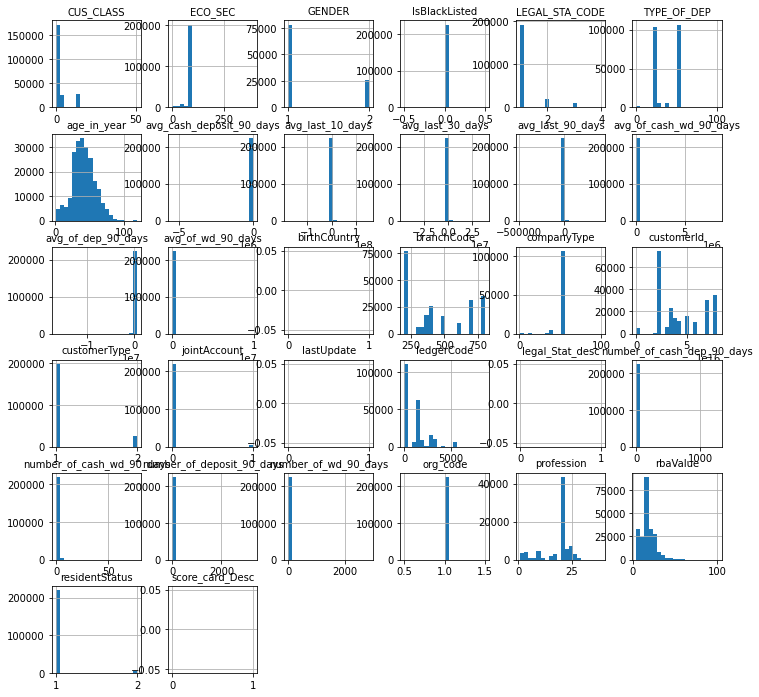

In [ ]:
%matplotlib inline
import matplotlib.pylab as plt
attribute_columns = list(df.columns)
if True:
    fontsize = 10
    fig = df[attribute_columns].hist(bins = 20, figsize = (12, 12),
                                       xlabelsize=fontsize,
                                       ylabelsize=fontsize)
    for x in fig.ravel():
        x.title.set_size(fontsize)
else:
    nrows = (len(attribute_columns)+1) // 2
    plt.figure(figsize=(12,25))
    for i in range(len(attribute_columns)):
        name = attribute_columns[i]
        plt.subplot(nrows,2,i+1)
        data[name].hist()
        plt.title(name, fontsize=14)
    
plt.show()

##Correlation

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


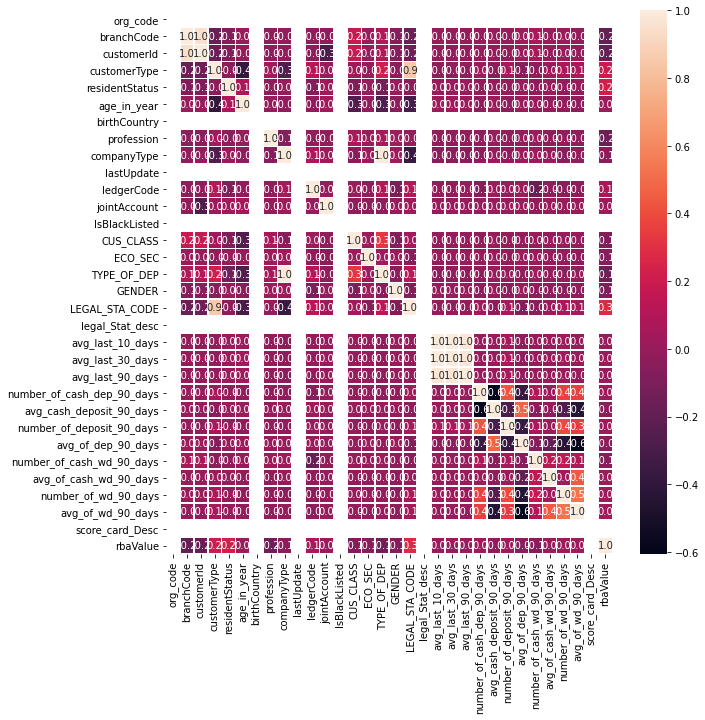

In [ ]:
# Corrrelations using seaborn
# Seaborn is a library for making statistical graphics in Python. It is built on top of matplotlib and closely integrated with pandas data structures.
# https://seaborn.pydata.org/introduction.html
import seaborn as sns
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()
#avg_last 10, 30 and 90 days seem to be highly correlated, so we may consider removing them for the regression analysis.

#Data Preparation & Feature Engineering

##Creating & Removing Variables

In [ ]:
#Remove columns with 1 or 0 unique values as these will add no information
df.drop(df.loc[:,df.nunique() < 2], axis = 1, inplace = True) 

In [ ]:
# Drop dateOfBirth as age in years already conveys this information. They even have the exact same Nas, looks like a variable created from birthdate
df.drop('dateOfBirth', axis = 1, inplace = True) 

In [ ]:
df.groupby(['nationalityOriginal','birthPlace']).nunique().customerId.sort_values(ascending = False)

nationalityOriginal  birthPlace
JO                   ????          26155
                     ?????         12302
                     ??????         9222
                     ???????        6571
                     ????????       2484
                                   ...  
KE                   BUNGOMA           1
JP                   tokyo             1
                     osaka             1
                     Jaban             1
AE                   0                 1
Name: customerId, Length: 1229, dtype: int64

In [ ]:
#from the above we see that most of the customers were born in Jordan, but in Birthplace, most are not classified. Additionally nationality has no NAs and seems to be better coded than birthPlace, so we drop birthplace
df.drop(['birthPlace'], axis=1, inplace=True)

In [ ]:
#Lets now compare rbaGradeAbrv and rba_grade_desc using groupby
df.groupby(['rbaGradeAbrv','rba_grade_desc']).nunique().customerId

rbaGradeAbrv  rba_grade_desc
H             High                  6
L             Low               58953
M             Medium            16380
Name: customerId, dtype: int64

In [ ]:
#From the above we see they correspond perfectly, so we remove rbaGradeAbrv as it is the same as rba_grade_desc
df.drop(['rbaGradeAbrv'], axis=1, inplace=True)

In [ ]:
#Creating the variable creationDate_indays
df['creationDate_indays'] = df['creationDate'].astype('datetime64[ns]').max()-df['creationDate'].astype('datetime64[ns]') 
df['creationDate_indays'] = df['creationDate_indays'].dt.days.astype('int16')
df['creationDate_indays'].head()

0    1295
1    1860
2    1860
3    1860
4    1860
Name: creationDate_indays, dtype: int16

In [ ]:
#drop creation date as we now have better information in creation in days
df.drop(['creationDate'], axis = 1, inplace = True)

In [ ]:
#Create our target variable for classification

# Rename rba_grade_desc to Risk description
df['Risk_Description'] = df['rba_grade_desc']

#drop 'rba_grade_desc' as we created a new variable 'Risk_Description'
df.drop(['rba_grade_desc'], axis = 1, inplace = True)


In [ ]:
#Lets take a look inside riskdescr
df.Risk_Description.value_counts()

Low       159680
Medium     65099
High          89
Name: Risk_Description, dtype: int64

In [ ]:
#Lets convert this to a binary variable by merging Medium and High
df.Risk_Description.replace({'Low': 0, 'Medium': 1, 'High': 1}, inplace=True)
df.Risk_Description.value_counts()

0    159680
1     65188
Name: Risk_Description, dtype: int64

Next logical thing would be to remove identifiers, but we should explore the data a little more before we do

In [ ]:
#Lets first check for duplicates
len(df)-len(df.drop_duplicates())

0

Apparently there are no obvious duplicates, if there were we would use df.drop_duplicates(). Lets check the number of customers, we suspect there are "hidden" duplicates

## Lets explore the grain of the data. What level of data should we do the analysis?

In [ ]:
print("Here are the number of unique customers: %s" %(df['customerId'].nunique()))
print("Here are the number of unique accounts: %s" %(df['fullaccount'].nunique()))

Here are the number of unique customers: 75339
Here are the number of unique accounts: 220434


Although there are only roughly 75k customers, there are roughly 220k accounts which mean each customer can have multiple accounts!

##Create a New DF at the Customer Level

In [ ]:
##We use groupby to see the information by customer, which is our new grain
df2= df.groupby('customerId').nunique()
df2

,branchCode,customerId,fullaccount,customerType,onboarding,residentStatus,residentCountry,nationalityOriginal,extraNationality,age_in_year,profession,companyType,ledgerCode,accountCurrency,jointAccount,CUS_CLASS,ECO_SEC,TYPE_OF_DEP,GENDER,LEGAL_STA_CODE,avg_last_10_days,avg_last_30_days,avg_last_90_days,number_of_cash_dep_90_days,avg_cash_deposit_90_days,number_of_deposit_90_days,avg_of_dep_90_days,number_of_cash_wd_90_days,avg_of_cash_wd_90_days,number_of_wd_90_days,avg_of_wd_90_days,score_card,rbaValue,creationDate_indays,Risk_Description
customerId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020027747,1,1,4,1,1,1,1,1,0,1,0,0,4,1,1,1,1,1,0,1,4,3,3,1,1,1,1,3,3,3,3,1,1,1,1
2020032263,1,1,3,1,1,1,1,1,0,1,1,1,3,1,1,1,1,1,1,1,3,3,3,1,1,1,1,1,1,1,1,1,1,1,1
2020035137,1,1,10,1,1,1,1,1,0,1,1,0,5,2,1,1,1,1,1,1,8,8,5,2,2,2,2,3,3,3,3,1,1,1,1
2020038042,1,1,1,1,1,1,1,1,0,1,0,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2020038921,1,1,5,1,1,1,1,1,0,1,1,0,4,1,1,1,1,1,1,1,5,5,5,2,2,2,2,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80527266000001400,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
80527266660000747,1,1,42,1,1,1,1,1,0,1,1,0,13,1,1,1,1,1,1,1,17,17,12,3,3,4,4,3,3,3,3,1,1,1,1
80527271300000137,1,1,5,1,1,1,1,1,0,1,0,1,4,1,1,1,1,1,1,1,4,4,3,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
df2.describe(include="all")

,branchCode,customerId,fullaccount,customerType,onboarding,residentStatus,residentCountry,nationalityOriginal,extraNationality,age_in_year,profession,companyType,ledgerCode,accountCurrency,jointAccount,CUS_CLASS,ECO_SEC,TYPE_OF_DEP,GENDER,LEGAL_STA_CODE,avg_last_10_days,avg_last_30_days,avg_last_90_days,number_of_cash_dep_90_days,avg_cash_deposit_90_days,number_of_deposit_90_days,avg_of_dep_90_days,number_of_cash_wd_90_days,avg_of_cash_wd_90_days,number_of_wd_90_days,avg_of_wd_90_days,score_card,rbaValue,creationDate_indays,Risk_Description
count,75339.0,75339.0,75339.000000,75339.0,75339.0,75339.0,75339.000000,75339.000000,75339.000000,75339.000000,75339.000000,75339.000000,75339.000000,75339.000000,75339.0,75339.0,75339.0,75339.0,75339.000000,75339.000000,75339.000000,75339.000000,75339.000000,75339.000000,75339.000000,75339.000000,75339.000000,75339.000000,75339.000000,75339.000000,75339.000000,75339.0,75339.0,75339.0,75339.0
mean,1.0,1.0,2.984749,1.0,1.0,1.0,0.996323,0.981616,0.007645,0.971622,0.368547,0.415402,2.611078,1.068066,1.0,1.0,1.0,1.0,0.504108,0.988930,2.275820,2.261259,2.090922,1.207210,1.219289,1.266170,1.280147,1.193738,1.203042,1.232801,1.241269,1.0,1.0,1.0,1.0
std,0.0,0.0,7.689244,0.0,0.0,0.0,0.060525,0.134335,0.087104,0.166052,0.482414,0.492795,2.224299,0.294610,0.0,0.0,0.0,0.0,0.499986,0.104631,2.712626,2.672851,2.191002,0.473126,0.504277,0.567832,0.599619,0.432588,0.457534,0.473822,0.494487,0.0,0.0,0.0,0.0
min,1.0,1.0,1.000000,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0
25%,1.0,1.0,1.000000,1.0,1.0,1.0,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0
50%,1.0,1.0,2.000000,1.0,1.0,1.0,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0
75%,1.0,1.0,4.000000,1.0,1.0,1.0,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.0,1.0,1.0,1.0,1.000000,1.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0
max,1.0,1.0,943.000000,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,8.000000,1.0,1.0,1.0,1.0,1.000000,1.000000,259.000000,259.000000,242.000000,6.000000,7.000000,8.000000,11.000000,5.000000,8.000000,7.000000,8.000000,1.0,1.0,1.0,1.0


In [ ]:
df2.columns


Index(['branchCode', 'customerId', 'fullaccount', 'customerType', 'onboarding',
       'residentStatus', 'residentCountry', 'nationalityOriginal',
       'extraNationality', 'age_in_year', 'profession', 'companyType',
       'ledgerCode', 'accountCurrency', 'jointAccount', 'CUS_CLASS', 'ECO_SEC',
       'TYPE_OF_DEP', 'GENDER', 'LEGAL_STA_CODE', 'avg_last_10_days',
       'avg_last_30_days', 'avg_last_90_days', 'number_of_cash_dep_90_days',
       'avg_cash_deposit_90_days', 'number_of_deposit_90_days',
       'avg_of_dep_90_days', 'number_of_cash_wd_90_days',
       'avg_of_cash_wd_90_days', 'number_of_wd_90_days', 'avg_of_wd_90_days',
       'score_card', 'rbaValue', 'creationDate_indays', 'Risk_Description'],
      dtype='object')

In [ ]:
#The following are non-unique characteristics of customer, more related to teh accounts and not the customer, so we need to aggregate them
Non_unique=['customerId','fullaccount', 'ledgerCode', 'accountCurrency', 'avg_last_10_days', 'avg_last_30_days', 'avg_last_90_days', 'number_of_cash_dep_90_days','avg_cash_deposit_90_days', 'number_of_deposit_90_days','avg_of_dep_90_days', 'number_of_cash_wd_90_days','avg_of_cash_wd_90_days', 'number_of_wd_90_days', 'avg_of_wd_90_days']
df_NU=df[Non_unique]
df_NU

,customerId,fullaccount,ledgerCode,accountCurrency,avg_last_10_days,avg_last_30_days,avg_last_90_days,number_of_cash_dep_90_days,avg_cash_deposit_90_days,number_of_deposit_90_days,avg_of_dep_90_days,number_of_cash_wd_90_days,avg_of_cash_wd_90_days,number_of_wd_90_days,avg_of_wd_90_days
0,20100400550000072,020100400550015817000,5817,JOD,8610000.00,2170000.00,23333.33,0,0.0,0,0.0,0,0.0,0,0.0
1,20200207860000638,020200207860011330000,1330,JOD,0.00,0.00,0.00,0,0.0,0,0.0,0,0.0,0,0.0
2,20200207860000638,020200207860011389002,1389,JOD,-137562.72,-34672.52,-369.81,0,0.0,0,0.0,0,0.0,0,0.0
3,20200207860000638,020200207860010060000,60,JOD,2079.79,526.87,6.68,4,-550.0,4,-550.0,1,50.0,1,50.0
4,20200207860000638,020200207860010010000,10,JOD,444.00,120.50,0.95,4,-540.0,4,-540.0,1,56.0,1,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224863,40400811920003507,040400811920010020000,20,JOD,82249.30,20728.80,222.94,0,0.0,0,0.0,0,0.0,0,0.0
224864,20200577640010547,020200577640015300042,5300,JOD,111388.80,28073.60,301.87,0,0.0,0,0.0,0,0.0,0,0.0
224865,50220271300005255,050220271300012980002,2980,JOD,6597.29,1662.73,17.88,0,0.0,0,0.0,0,0.0,0,0.0
224866,70424500690004664,070424500690011396000,1396,JOD,-110.01,-18.34,0.00,0,0.0,0,0.0,0,0.0,0,0.0


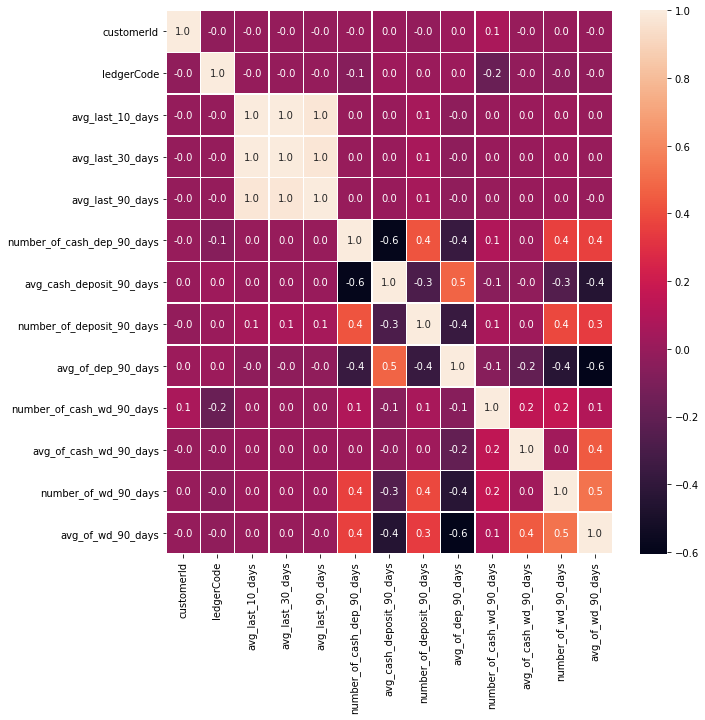

In [ ]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_NU.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()
#Multicolinearity w/ non-unique values

In [ ]:
#Shape before we filter out to keep only unique
df.shape

(224868, 35)

In [ ]:
#Lets only keep the columns that are unique cahracteristics of a customer so we can separately manipulate the non-unique characteristics
unique= ['branchCode', 'customerId', 'customerType','onboarding', 'residentStatus', 'residentCountry','nationalityOriginal', 'extraNationality', 'age_in_year', 'profession', 'companyType','jointAccount', 'CUS_CLASS', 'ECO_SEC', 'TYPE_OF_DEP', 'GENDER', 'LEGAL_STA_CODE', 'score_card', 'rbaValue','creationDate_indays', 'Risk_Description']
df=df[unique]
df

,branchCode,customerId,customerType,onboarding,residentStatus,residentCountry,nationalityOriginal,extraNationality,age_in_year,profession,companyType,jointAccount,CUS_CLASS,ECO_SEC,TYPE_OF_DEP,GENDER,LEGAL_STA_CODE,score_card,rbaValue,creationDate_indays,Risk_Description
0,201,20100400550000072,2,N,1,JO,JO,NaN,NaN,NaN,35.0,0,4,46,35,NaN,2.0,E-Existing,13.20,1295,0
1,202,20200207860000638,1,N,1,JO,JO,NaN,30.0,27.0,NaN,0,2,90,23,2.0,1.0,I-Existing,16.93,1860,0
2,202,20200207860000638,1,N,1,JO,JO,NaN,30.0,27.0,NaN,0,2,90,23,2.0,1.0,I-Existing,16.93,1860,0
3,202,20200207860000638,1,N,1,JO,JO,NaN,30.0,27.0,NaN,0,2,90,23,2.0,1.0,I-Existing,16.93,1860,0
4,202,20200207860000638,1,N,1,JO,JO,NaN,30.0,27.0,NaN,0,2,90,23,2.0,1.0,I-Existing,16.93,1860,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224863,404,40400811920003507,1,N,1,JO,JO,NaN,66.0,NaN,NaN,0,2,90,20,1.0,1.0,I-Existing,16.53,364,0
224864,202,20200577640010547,2,N,1,JO,JO,NaN,13.0,NaN,35.0,0,4,42,35,NaN,3.0,E-Existing,57.60,5199,1
224865,502,50220271300005255,1,N,1,JO,JO,NaN,41.0,NaN,51.0,0,2,90,51,NaN,1.0,I-Existing,14.53,6633,0
224866,704,70424500690004664,1,N,1,JO,JO,NaN,70.0,NaN,NaN,0,2,90,20,2.0,1.0,I-Existing,24.53,3931,1


In [ ]:
#Shape after keeping only unique
df.shape

(224868, 21)

In [ ]:
#Lets now check for duplicates 
len(df)-len(df.drop_duplicates())

149529

In [ ]:
#We now see a lot of duplicates, let removed them
df.drop_duplicates(inplace=True) 
df

,branchCode,customerId,customerType,onboarding,residentStatus,residentCountry,nationalityOriginal,extraNationality,age_in_year,profession,companyType,jointAccount,CUS_CLASS,ECO_SEC,TYPE_OF_DEP,GENDER,LEGAL_STA_CODE,score_card,rbaValue,creationDate_indays,Risk_Description
0,201,20100400550000072,2,N,1,JO,JO,NaN,NaN,NaN,35.0,0,4,46,35,NaN,2.0,E-Existing,13.20,1295,0
1,202,20200207860000638,1,N,1,JO,JO,NaN,30.0,27.0,NaN,0,2,90,23,2.0,1.0,I-Existing,16.93,1860,0
10,202,20200217770000674,2,N,1,JO,JO,NaN,43.0,NaN,NaN,0,2,90,20,NaN,1.0,E-Existing,13.20,1844,0
16,202,20200221280000700,1,N,1,JO,JO,NaN,46.0,NaN,NaN,0,2,90,20,NaN,1.0,I-Existing,15.28,1820,0
20,202,20200243330000833,1,N,1,JO,JO,NaN,32.0,3.0,NaN,0,2,90,20,1.0,1.0,I-Existing,16.53,1753,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224835,208,20802308120001233,1,N,2,JO,SE,NaN,55.0,NaN,NaN,0,2,90,20,NaN,NaN,I-Existing,20.08,2364,1
224836,356,35600856230010573,1,N,1,JO,JO,NaN,23.0,20.0,51.0,0,2,90,51,1.0,1.0,I-New,10.50,245,0
224837,704,70400919180005952,1,N,1,JO,JO,NaN,16.0,NaN,NaN,0,3,90,28,1.0,1.0,I-New,20.50,96,1
224850,205,20500897390010469,1,N,1,JO,JO,NaN,26.0,20.0,51.0,0,2,90,51,1.0,1.0,I-New,10.50,151,0


In [ ]:
#lets look at the non-unique
df_NU.describe(include="all")

,customerId,fullaccount,ledgerCode,accountCurrency,avg_last_10_days,avg_last_30_days,avg_last_90_days,number_of_cash_dep_90_days,avg_cash_deposit_90_days,number_of_deposit_90_days,avg_of_dep_90_days,number_of_cash_wd_90_days,avg_of_cash_wd_90_days,number_of_wd_90_days,avg_of_wd_90_days
count,2.248680e+05,224868,224868.000000,224868,2.248680e+05,2.248680e+05,224868.000000,224868.000000,2.248680e+05,224868.000000,2.248680e+05,224868.000000,2.248680e+05,224868.000000,2.248680e+05
unique,NaN,220434,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,020902507770010010000,NaN,JOD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,26,NaN,214657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.394503e+16,NaN,1059.328757,NaN,7.832261e+03,1.988950e+03,18.871381,0.491422,-1.113435e+03,1.131437,-3.540383e+03,0.254305,4.763851e+02,0.868518,2.450953e+03
std,2.349321e+16,NaN,1280.875258,NaN,1.325116e+06,3.344322e+05,3685.041168,5.335240,3.028084e+04,19.713739,9.151602e+04,1.175586,2.028110e+04,12.373992,5.819818e+04
min,2.020028e+09,NaN,10.000000,NaN,-1.791005e+08,-4.513426e+07,-485686.730000,0.000000,-5.482044e+06,0.000000,-1.654371e+07,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,2.070207e+16,NaN,20.000000,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00
50%,4.011205e+16,NaN,1302.000000,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00
75%,7.012410e+16,NaN,1396.000000,NaN,6.914525e+02,1.826150e+02,1.100000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00


In [ ]:
#We need to aggregate the non unique values, wil do count for some and average for others
countables=['customerId','fullaccount', 'ledgerCode', 'accountCurrency']
averageble=['customerId','avg_last_10_days', 'avg_last_30_days', 'avg_last_90_days', 'number_of_cash_dep_90_days', 'avg_cash_deposit_90_days', 'number_of_deposit_90_days','avg_of_dep_90_days', 'number_of_cash_wd_90_days','avg_of_cash_wd_90_days', 'number_of_wd_90_days', 'avg_of_wd_90_days']

#Create a DF for non-unique countables aggregated
df_NU_CO= df_NU[countables]
df_NU_CO=df_NU_CO.groupby('customerId').nunique()
df_NU_CO.drop(['customerId'],axis=1,inplace=True)
df_NU_CO.rename(columns = {'fullaccount': 'Num_Accounts', 'ledgerCode': 'Num_ledgerCode', 'accountCurrency':'Num_Currency'}, inplace = True) ##Rename the columns
df_NU_CO


,Num_Accounts,Num_ledgerCode,Num_Currency
customerId,,,
2020027747,4,4,1
2020032263,3,3,1
2020035137,10,5,2
2020038042,1,1,1
2020038921,5,4,1
...,...,...,...
80527266000001400,1,1,1
80527266660000747,42,13,1
80527271300000137,5,4,1


In [ ]:
df_NU_CO.shape

(75339, 3)

In [ ]:
## Creating a DF for non-unique averagable
df_NU_AV= df_NU[averageble]
df_NU_AV=df_NU_AV.groupby('customerId').mean()
df_NU_AV

,avg_last_10_days,avg_last_30_days,avg_last_90_days,number_of_cash_dep_90_days,avg_cash_deposit_90_days,number_of_deposit_90_days,avg_of_dep_90_days,number_of_cash_wd_90_days,avg_of_cash_wd_90_days,number_of_wd_90_days,avg_of_wd_90_days
customerId,,,,,,,,,,,
2020027747,103419.100000,26064.990000,281.500000,0.000000,0.000000,0.000000,0.000000,0.750000,652.166500,0.750000,652.166500
2020032263,-53776.036667,-13546.296667,-145.603333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020035137,660976.254000,166646.108000,1787.027000,0.200000,-900.000000,0.200000,-900.000000,0.600000,650.000000,0.600000,650.000000
2020038042,87.700000,28.200000,0.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020038921,311057.078000,78396.672000,843.734000,0.200000,-174.000000,0.200000,-174.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
80527266000001400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
80527266660000747,-185828.132143,-46698.498810,-577.600000,0.095238,-119.047619,0.357143,-12952.380952,0.380952,1499.619048,0.595238,4062.714286
80527271300000137,-19040.688000,-4793.654000,-51.114000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
df_NU_AV.shape

(75339, 11)

In [ ]:
#We then need to merge the df now contaning non-numerics with the two numerics  DFs [nonaveragble (df_NU_CO) and averagble df_NU_AV]
df=df.merge(df_NU_CO,on='customerId',how='left').merge(df_NU_AV,on='customerId', how='left')
df

,branchCode,customerId,customerType,onboarding,residentStatus,residentCountry,nationalityOriginal,extraNationality,age_in_year,profession,companyType,jointAccount,CUS_CLASS,ECO_SEC,TYPE_OF_DEP,GENDER,LEGAL_STA_CODE,score_card,rbaValue,creationDate_indays,Risk_Description,Num_Accounts,Num_ledgerCode,Num_Currency,avg_last_10_days,avg_last_30_days,avg_last_90_days,number_of_cash_dep_90_days,avg_cash_deposit_90_days,number_of_deposit_90_days,avg_of_dep_90_days,number_of_cash_wd_90_days,avg_of_cash_wd_90_days,number_of_wd_90_days,avg_of_wd_90_days
0,201,20100400550000072,2,N,1,JO,JO,NaN,NaN,NaN,35.0,0,4,46,35,NaN,2.0,E-Existing,13.20,1295,0,1,1,1,8.610000e+06,2.170000e+06,23333.330000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,202,20200207860000638,1,N,1,JO,JO,NaN,30.0,27.0,NaN,0,2,90,23,2.0,1.0,I-Existing,16.93,1860,0,9,6,1,-1.500159e+04,-3.779883e+03,-40.234444,0.888889,-121.111111,0.888889,-121.111111,0.222222,11.777778,0.222222,11.777778
2,202,20200217770000674,2,N,1,JO,JO,NaN,43.0,NaN,NaN,0,2,90,20,NaN,1.0,E-Existing,13.20,1844,0,6,6,1,-2.458080e+03,-6.188850e+02,-6.656667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,202,20200221280000700,1,N,1,JO,JO,NaN,46.0,NaN,NaN,0,2,90,20,NaN,1.0,I-Existing,15.28,1820,0,4,4,1,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,202,20200243330000833,1,N,1,JO,JO,NaN,32.0,3.0,NaN,0,2,90,20,1.0,1.0,I-Existing,16.53,1753,0,3,3,1,-9.226610e+03,-2.329537e+03,-24.766667,1.666667,-93.500000,1.666667,-93.500000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75334,208,20802308120001233,1,N,2,JO,SE,NaN,55.0,NaN,NaN,0,2,90,20,NaN,NaN,I-Existing,20.08,2364,1,1,1,1,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75335,356,35600856230010573,1,N,1,JO,JO,NaN,23.0,20.0,51.0,0,2,90,51,1.0,1.0,I-New,10.50,245,0,1,1,1,1.254000e+01,3.140000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.500000,1.000000,3.500000
75336,704,70400919180005952,1,N,1,JO,JO,NaN,16.0,NaN,NaN,0,3,90,28,1.0,1.0,I-New,20.50,96,1,1,1,1,2.460000e+03,6.880000e+02,12.440000,2.000000,-440.000000,2.000000,-440.000000,0.000000,0.000000,0.000000,0.000000
75337,205,20500897390010469,1,N,1,JO,JO,NaN,26.0,20.0,51.0,0,2,90,51,1.0,1.0,I-New,10.50,151,0,1,1,1,6.048420e+03,1.521210e+03,15.690000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
#Lets set Customer ID as the Index
df.set_index('customerId')

,branchCode,customerType,onboarding,residentStatus,residentCountry,nationalityOriginal,extraNationality,age_in_year,profession,companyType,jointAccount,CUS_CLASS,ECO_SEC,TYPE_OF_DEP,GENDER,LEGAL_STA_CODE,score_card,rbaValue,creationDate_indays,Risk_Description,Num_Accounts,Num_ledgerCode,Num_Currency,avg_last_10_days,avg_last_30_days,avg_last_90_days,number_of_cash_dep_90_days,avg_cash_deposit_90_days,number_of_deposit_90_days,avg_of_dep_90_days,number_of_cash_wd_90_days,avg_of_cash_wd_90_days,number_of_wd_90_days,avg_of_wd_90_days
customerId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20100400550000072,201,2,N,1,JO,JO,NaN,NaN,NaN,35.0,0,4,46,35,NaN,2.0,E-Existing,13.20,1295,0,1,1,1,8.610000e+06,2.170000e+06,23333.330000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
20200207860000638,202,1,N,1,JO,JO,NaN,30.0,27.0,NaN,0,2,90,23,2.0,1.0,I-Existing,16.93,1860,0,9,6,1,-1.500159e+04,-3.779883e+03,-40.234444,0.888889,-121.111111,0.888889,-121.111111,0.222222,11.777778,0.222222,11.777778
20200217770000674,202,2,N,1,JO,JO,NaN,43.0,NaN,NaN,0,2,90,20,NaN,1.0,E-Existing,13.20,1844,0,6,6,1,-2.458080e+03,-6.188850e+02,-6.656667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
20200221280000700,202,1,N,1,JO,JO,NaN,46.0,NaN,NaN,0,2,90,20,NaN,1.0,I-Existing,15.28,1820,0,4,4,1,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
20200243330000833,202,1,N,1,JO,JO,NaN,32.0,3.0,NaN,0,2,90,20,1.0,1.0,I-Existing,16.53,1753,0,3,3,1,-9.226610e+03,-2.329537e+03,-24.766667,1.666667,-93.500000,1.666667,-93.500000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20802308120001233,208,1,N,2,JO,SE,NaN,55.0,NaN,NaN,0,2,90,20,NaN,NaN,I-Existing,20.08,2364,1,1,1,1,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
35600856230010573,356,1,N,1,JO,JO,NaN,23.0,20.0,51.0,0,2,90,51,1.0,1.0,I-New,10.50,245,0,1,1,1,1.254000e+01,3.140000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.500000,1.000000,3.500000
70400919180005952,704,1,N,1,JO,JO,NaN,16.0,NaN,NaN,0,3,90,28,1.0,1.0,I-New,20.50,96,1,1,1,1,2.460000e+03,6.880000e+02,12.440000,2.000000,-440.000000,2.000000,-440.000000,0.000000,0.000000,0.000000,0.000000


#Preprocessing

##Handling Missing Values

###Drop columns with a significant amount of NAs

In [ ]:
##Lets check missing values and remove any columns that have a significant amount of missing values
missing_values = missing_values_table(df)
missing_values.head(20)

Your selected dataframe has 35 columns.
There are 8 columns that have missing values.


,Missing Values,% of Total Values
extraNationality,74763,99.2
profession,47573,63.1
companyType,44043,58.5
GENDER,37360,49.6
age_in_year,2138,2.8
nationalityOriginal,1385,1.8
LEGAL_STA_CODE,834,1.1
residentCountry,277,0.4


In [ ]:
# While we can use dropna Pandas method we prefered to select columns in terms of % of missing values instead of defining a threshold as an integer. 
cols_to_drop=df.loc[:, 100*df.isnull().sum()/df.isnull().count() > 90]
#To delete the column without having to reassign df you can do:
df.drop(cols_to_drop, axis=1, inplace = True)

###Imputing Missing values

In [ ]:
missing_values = missing_values_table(df)
missing_values.head(20)

Your selected dataframe has 34 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
profession,47573,63.1
companyType,44043,58.5
GENDER,37360,49.6
age_in_year,2138,2.8
nationalityOriginal,1385,1.8
LEGAL_STA_CODE,834,1.1
residentCountry,277,0.4


In [ ]:
#Import SimpleImputer
from sklearn.impute import SimpleImputer

#Fit Simple Imputer on age_in_year using mean
s_imputer = SimpleImputer(missing_values=np.nan, strategy = 'mean')
s_imputer = s_imputer.fit(df[['age_in_year']])
df[['age_in_year']] = s_imputer.transform(df[['age_in_year']])

#Fit Simple Imputer on columns using most frequent
s_imputer = SimpleImputer(missing_values=np.nan, strategy = 'most_frequent')
s_imputer = s_imputer.fit(df[['LEGAL_STA_CODE','nationalityOriginal','residentCountry']])
df[['LEGAL_STA_CODE','nationalityOriginal','residentCountry']] = s_imputer.transform(df[['LEGAL_STA_CODE','nationalityOriginal','residentCountry']])

#Fit Simple Imputer on columns using constant value
s_imputer = SimpleImputer(missing_values=np.nan, strategy = 'constant',fill_value=0)
s_imputer = s_imputer.fit(df[['profession','companyType','GENDER']])
df[['profession','companyType','GENDER']] = s_imputer.transform(df[['profession','companyType','GENDER']])


In [ ]:
missing_values = missing_values_table(df)
missing_values.head(20)

Your selected dataframe has 34 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


##Check our data types and work with categorical data

In [ ]:
#Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75339 entries, 0 to 75338
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   branchCode                  75339 non-null  int64  
 1   customerId                  75339 non-null  int64  
 2   customerType                75339 non-null  int64  
 3   onboarding                  75339 non-null  object 
 4   residentStatus              75339 non-null  int64  
 5   residentCountry             75339 non-null  object 
 6   nationalityOriginal         75339 non-null  object 
 7   age_in_year                 75339 non-null  float64
 8   profession                  75339 non-null  float64
 9   companyType                 75339 non-null  float64
 10  jointAccount                75339 non-null  int64  
 11  CUS_CLASS                   75339 non-null  int64  
 12  ECO_SEC                     75339 non-null  int64  
 13  TYPE_OF_DEP                 753

We see the types are mixed, for example customer type is an integer, but it obviously a categorical variable.



In [ ]:
##Idealy we would use Object and time date to cast some features as categorical, but we see above some categorical features are already numbers. So instead of something like
#cat_columns = df.select_dtypes(include=['object', 'datetime64']).columns
#We manually set them
categorical=['customerType','branchCode', 'onboarding', 'residentStatus', 'residentCountry', 'nationalityOriginal', 'profession', 'companyType', 'jointAccount', 'CUS_CLASS', 'ECO_SEC', 'TYPE_OF_DEP', 'GENDER', 'LEGAL_STA_CODE', 'score_card']
df[categorical]=df[categorical].astype('category')
#https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75339 entries, 0 to 75338
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   branchCode                  75339 non-null  category
 1   customerId                  75339 non-null  int64   
 2   customerType                75339 non-null  category
 3   onboarding                  75339 non-null  category
 4   residentStatus              75339 non-null  category
 5   residentCountry             75339 non-null  category
 6   nationalityOriginal         75339 non-null  category
 7   age_in_year                 75339 non-null  float64 
 8   profession                  75339 non-null  category
 9   companyType                 75339 non-null  category
 10  jointAccount                75339 non-null  category
 11  CUS_CLASS                   75339 non-null  category
 12  ECO_SEC                     75339 non-null  category
 13  TYPE_OF_DEP     

####Group columns analyze over-under represented

In [ ]:
#Check relative frequency in each categorical variable
for var in categorical:
    print(round(df[var].value_counts(normalize=True)*100,2))

1    93.93
2     6.07
Name: customerType, dtype: float64
202    6.55
701    6.34
208    5.59
704    5.19
805    4.37
801    4.35
209    4.23
502    3.85
501    3.68
402    3.52
601    3.43
702    3.39
206    3.31
354    3.25
207    3.23
403    3.22
802    3.05
401    3.00
205    2.96
803    2.96
204    2.66
356    2.55
603    2.49
302    2.38
351    2.25
804    2.16
203    2.15
357    1.97
404    1.88
201    0.04
Name: branchCode, dtype: float64
N    94.93
Y     5.07
Name: onboarding, dtype: float64
1    96.94
2     3.06
Name: residentStatus, dtype: float64
JO    97.05
IQ     0.58
SA     0.40
OM     0.38
US     0.21
      ...  
SO     0.00
LR     0.00
UY     0.00
AS     0.00
AF     0.00
Name: residentCountry, Length: 62, dtype: float64
JO    94.33
IQ     1.55
EG     1.25
SY     1.01
LY     0.27
      ...  
UY     0.00
SO     0.00
AT     0.00
AF     0.00
TH     0.00
Name: nationalityOriginal, Length: 67, dtype: float64
0.0     63.15
20.0    14.84
21.0     5.12
23.0     3.41
25.0     2.6

We see that there are many categorical values that have unbalanced classes, and the smaller class has many smaller categories that may not be relevant. We will use one hot encoding, so we will also recover some of the category names when they are numerical.

In [ ]:
#customerType - Lets recover variable names
df.customerType.replace({1: 'Individual', 2: 'Entity'}, inplace=True)
round(df['customerType'].value_counts(normalize=True)*100,2)

Individual    93.93
Entity         6.07
Name: customerType, dtype: float64

In [ ]:
#residentStatus - Lets recover variable names
df.residentStatus.replace({1: 'Resident', 2: 'Non_Resident'}, inplace=True)
round(df['residentStatus'].value_counts(normalize=True)*100,2)

Resident        96.94
Non_Resident     3.06
Name: residentStatus, dtype: float64

In [ ]:
#lets use groupby again to compare these categorical variables
df.groupby(['residentCountry','residentStatus',]).nunique().customerId.sort_values(ascending = False)

residentCountry  residentStatus
JO               Resident          72667
                 Non_Resident        448
IQ               Non_Resident        413
SA               Non_Resident        292
OM               Resident            278
                                   ...  
IE               Resident              0
FR               Resident              0
FI               Resident              0
ES               Resident              0
JP               Resident              0
Name: customerId, Length: 124, dtype: int64

In [ ]:
#Remove resident country as the above provides very much the same information, resident status of 1, is resident which is Jordan,
df.drop('residentCountry', axis=1, inplace = True)

In [ ]:
# nationalityOriginal - Most are from Jordan lets group all others into one category - We suspect this will be highly correlated to resident, but could provide some additional info
#First wee need to create a category for Non-Jordanian
df['nationalityOriginal'] = df['nationalityOriginal'].cat.add_categories('Non_JO')
#We assign non-jordanians to this category
df.loc[df.nationalityOriginal != "JO", "nationalityOriginal"] = "Non_JO"
#We remove unused categories
df['nationalityOriginal'] = df['nationalityOriginal'].cat.remove_unused_categories()
round(df['nationalityOriginal'].value_counts(normalize=True)*100,2)


JO        94.33
Non_JO     5.67
Name: nationalityOriginal, dtype: float64

In [ ]:
#Lets look at Profession
df.groupby(['customerType','profession']).nunique().customerId.sort_values(ascending = False)

customerType  profession
Individual    0.0           43162
              20.0          11179
Entity        0.0            4411
Individual    21.0           3857
              23.0           2568
                            ...  
Entity        23.0              0
              16.0              0
              22.0              0
              18.0              0
              39.0              0
Name: customerId, Length: 66, dtype: int64

In [ ]:
#We see that there are some entity accounts that have a profession associated, these could be individuals that have a company. Lets use the top 10 categories that account for 90.76% of all the values
top_values=[20, 21, 23, 25, 10, 3, 17, 2, 22, 26,0] #We imoputed NAs as 0, so we add it so we can add a category for "Unknown"
for item in df.profession: 
    if item not in top_values: 
        df.profession.replace({item:99 }, inplace=True)

In [ ]:
df.profession.replace({ 0:'Unknown', 99: 'Other', 20:'Officer', 21: 'retired', 23: 'House_wife', 25:"Co_Owner", 10: 'dealer', 3: 'Teacher', 17: 'Director', 2:'Engineer', 22:'Student', 26: 'Driver'}, inplace=True)
round(df['profession'].value_counts(normalize=True)*100,2)

Unknown       63.15
Officer       14.84
retired        5.12
House_wife     3.41
Other          3.41
Co_Owner       2.65
dealer         1.77
Teacher        1.74
Director       1.26
Engineer       0.96
Student        0.90
Driver         0.80
Name: profession, dtype: float64

In [ ]:
#companyType - We only have one clasification in the metadata 51 which corresponds to 'Company', there are 58.5% of Missing values, so in the abscence of being able to consult with the customer we will drop this variable
df.drop('companyType', axis=1, inplace = True)

In [ ]:
#jointAccount - Lets recover variable names
df.jointAccount.replace({0: 'Normal_Account', 1: 'Joint_Account'}, inplace=True)
round(df['jointAccount'].value_counts(normalize=True)*100,2)

Normal_Account    98.25
Joint_Account      1.75
Name: jointAccount, dtype: float64

In [ ]:
#Customer class - The top 5 categories include 99.8% of the variables, category 15 is "Other", so we will add all the non-top to "Other"
top_values=[2,15,13,4,0]
for item in df.CUS_CLASS: 
    if item not in top_values: 
        df.CUS_CLASS.replace({item: 15}, inplace=True)
##[df.CUS_CLASS.replace({item: 99}, inplace=True) if item not in top_values for item in df.CUS_CLASS]   ##I tried list comprehension but couldn't get it to work


In [ ]:
#CUS_CLASS - Lets recover variable names- From the translated file looks like this is a KYC fileld, identification
df.CUS_CLASS.replace({2: 'CS_Identity', 15: 'Other', 4: 'Comm_Rec', 0: 'None'}, inplace=True)
round(df['CUS_CLASS'].value_counts(normalize=True)*100,2)

CS_Identity    71.50
Other          23.33
Comm_Rec        3.71
None            1.46
Name: CUS_CLASS, dtype: float64

In [ ]:
#ECO_SEC - The top category is 90 which corresponds to Individuals
#Lets look at sectors by customer type
df.groupby(['customerType','ECO_SEC']).nunique().customerId.sort_values(ascending = False)

customerType  ECO_SEC
Individual    90         69753
Entity        62           670
              90           649
              99           332
              63           320
                         ...  
Individual    209            0
              212            0
              213            0
              214            0
              392            0
Name: customerId, Length: 412, dtype: int64

In [ ]:
#Lets look at the top 10 categories within ECO_SEC
round(df.loc[df['customerType']=='Entity','ECO_SEC'].value_counts(normalize=True)*100,2).head(10)

62    14.65
90    14.19
99     7.26
63     7.00
51     5.09
46     3.59
40     2.58
42     1.92
65     1.57
1      1.40
Name: ECO_SEC, dtype: float64

In [ ]:
#So lets keep the top 10 - We use 99 which is categorized as other
top_values=[62,90,99,63,51,46,40,42,65,1]
for item in df.ECO_SEC: 
    if item not in top_values: 
        df.ECO_SEC.replace({item: 99}, inplace=True)
round(df['ECO_SEC'].value_counts(normalize=True)*100,2)

90    93.45
99     4.00
62     0.93
63     0.44
51     0.33
46     0.29
40     0.18
42     0.14
1      0.13
65     0.11
Name: ECO_SEC, dtype: float64

In [ ]:
#ECO_SEC - Lets recover variable names- From the translated file looks like this is a KYC fileld, identification
df.ECO_SEC.replace({62:'Ed_Health_Cul',90:'Individuals',99:'Other',63:'Rel_Cha' ,51: 'Constr' ,46: 'Other_Commer' ,40: 'Food' ,42: 'Auto',65: 'Tour',1:'Public_Fin'}, inplace=True)
round(df['ECO_SEC'].value_counts(normalize=True)*100,2)

Individuals      93.45
Other             4.00
Ed_Health_Cul     0.93
Rel_Cha           0.44
Constr            0.33
Other_Commer      0.29
Food              0.18
Auto              0.14
Public_Fin        0.13
Tour              0.11
Name: ECO_SEC, dtype: float64

In [ ]:
#TYPE_OF_DEP The top 10 categories include 97.95% of the variables, we will add all the non-top to "Other" cast as 99. 
top_values=[20, 51, 28, 54, 37, 23, 1, 52, 15, 22]
for item in df.TYPE_OF_DEP: 
    if item not in top_values: 
        df.TYPE_OF_DEP.replace({item: 99}, inplace=True)
round(df['TYPE_OF_DEP'].value_counts(normalize=True)*100,2)

20    49.85
51    35.47
28     6.35
99     2.05
54     1.71
37     1.20
23     0.99
1      0.88
52     0.77
15     0.42
22     0.31
Name: TYPE_OF_DEP, dtype: float64

In [ ]:
#TYPE_OF_DEP Lets recover variable names- From the translated file looks like this is a KYC fileld, identification
df.TYPE_OF_DEP.replace({20:'Personal', 51:'Salary', 28:'Minor', 54: 'LLC', 37:'Personal_Cos', 23:'Bank_Employ', 1:'Govt', 52:'Solidarity', 15:'Charity', 22:'Professionals',99:'Other'}, inplace=True)
round(df['TYPE_OF_DEP'].value_counts(normalize=True)*100,2)

Personal         49.85
Salary           35.47
Minor             6.35
Other             2.05
LLC               1.71
Personal_Cos      1.20
Bank_Employ       0.99
Govt              0.88
Solidarity        0.77
Charity           0.42
Professionals     0.31
Name: TYPE_OF_DEP, dtype: float64

In [ ]:
#GENDER
df.GENDER.replace({1: 'Male', 0: 'Unknown', 2: 'Female'}, inplace=True)
round(df['GENDER'].value_counts(normalize=True)*100,2)

Unknown    49.59
Male       34.41
Female     16.00
Name: GENDER, dtype: float64

In [ ]:
#LEGAL_STA_CODE
df.LEGAL_STA_CODE.replace({1: 'Govt_Budget', 2: 'Govt_NO_Budget', 3:'Soc_Security',4:'Municipalities'}, inplace=True)
round(df['LEGAL_STA_CODE'].value_counts(normalize=True)*100,2)

Govt_Budget       93.19
Govt_NO_Budget     5.38
Municipalities     0.94
Soc_Security       0.50
Name: LEGAL_STA_CODE, dtype: float64

From the above it seems like this is missclassiffied as 93% of customers are individuals, not govet institutions, so we will drop this variable.

In [ ]:
df.drop('LEGAL_STA_CODE', axis=1, inplace = True)

##Encoding

###OneHotEncoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder

##add drop='first' to avoid multicolinearity in the linear model
onehotencoder = OneHotEncoder(drop='first')
X = df[['onboarding','customerType','nationalityOriginal','score_card','residentStatus','jointAccount','CUS_CLASS','profession','ECO_SEC','TYPE_OF_DEP','GENDER']]
X = onehotencoder.fit_transform(X).toarray()
new_colums = onehotencoder.get_feature_names(['onboarding','customerType','nationalityOriginal','score_card','residentStatus','jointAccount','CUS_CLASS','profession','ECO_SEC','TYPE_OF_DEP','GENDER'])
#This data frame is ready to append to df, and remove original features one hot encoded
X = pd.DataFrame(X, columns = new_colums)
df = pd.concat([df, X], axis=1)
df.drop(['onboarding','customerType','nationalityOriginal','score_card','residentStatus','jointAccount','CUS_CLASS','profession','ECO_SEC','TYPE_OF_DEP','GENDER'], axis=1, inplace = True)

In [ ]:
df.head()

,branchCode,customerId,age_in_year,rbaValue,creationDate_indays,Risk_Description,Num_Accounts,Num_ledgerCode,Num_Currency,avg_last_10_days,avg_last_30_days,avg_last_90_days,number_of_cash_dep_90_days,avg_cash_deposit_90_days,number_of_deposit_90_days,avg_of_dep_90_days,number_of_cash_wd_90_days,avg_of_cash_wd_90_days,number_of_wd_90_days,avg_of_wd_90_days,onboarding_Y,customerType_Individual,nationalityOriginal_Non_JO,score_card_E-NEW,score_card_I-Existing,score_card_I-New,residentStatus_Resident,jointAccount_Normal_Account,CUS_CLASS_Comm_Rec,CUS_CLASS_None,CUS_CLASS_Other,profession_Director,profession_Driver,profession_Engineer,profession_House_wife,profession_Officer,profession_Other,profession_Student,profession_Teacher,profession_Unknown,profession_dealer,profession_retired,ECO_SEC_Constr,ECO_SEC_Ed_Health_Cul,ECO_SEC_Food,ECO_SEC_Individuals,ECO_SEC_Other,ECO_SEC_Other_Commer,ECO_SEC_Public_Fin,ECO_SEC_Rel_Cha,ECO_SEC_Tour,TYPE_OF_DEP_Charity,TYPE_OF_DEP_Govt,TYPE_OF_DEP_LLC,TYPE_OF_DEP_Minor,TYPE_OF_DEP_Other,TYPE_OF_DEP_Personal,TYPE_OF_DEP_Personal_Cos,TYPE_OF_DEP_Professionals,TYPE_OF_DEP_Salary,TYPE_OF_DEP_Solidarity,GENDER_Male,GENDER_Unknown
0,201,20100400550000072,40.470649,13.20,1295,0,1,1,1,8.610000e+06,2.170000e+06,23333.330000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,202,20200207860000638,30.000000,16.93,1860,0,9,6,1,-1.500159e+04,-3.779883e+03,-40.234444,0.888889,-121.111111,0.888889,-121.111111,0.222222,11.777778,0.222222,11.777778,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,202,20200217770000674,43.000000,13.20,1844,0,6,6,1,-2.458080e+03,-6.188850e+02,-6.656667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,202,20200221280000700,46.000000,15.28,1820,0,4,4,1,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,202,20200243330000833,32.000000,16.53,1753,0,3,3,1,-9.226610e+03,-2.329537e+03,-24.766667,1.666667,-93.500000,1.666667,-93.500000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


##Standardization

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [ ]:
col_names = ['creationDate_indays','age_in_year','avg_last_10_days', 'avg_last_30_days', 'avg_last_90_days', 'number_of_cash_dep_90_days','avg_cash_deposit_90_days', 'number_of_deposit_90_days','avg_of_dep_90_days', 'number_of_cash_wd_90_days','avg_of_cash_wd_90_days', 'number_of_wd_90_days', 'avg_of_wd_90_days']
ss = StandardScaler()
df_scaled = pd.DataFrame(ss.fit_transform(df[col_names].values), columns=col_names)
df.drop(['creationDate_indays','age_in_year','avg_last_10_days', 'avg_last_30_days', 'avg_last_90_days', 'number_of_cash_dep_90_days','avg_cash_deposit_90_days', 'number_of_deposit_90_days','avg_of_dep_90_days', 'number_of_cash_wd_90_days','avg_of_cash_wd_90_days', 'number_of_wd_90_days', 'avg_of_wd_90_days'], axis=1, inplace = True)
df = pd.concat([df, df_scaled], axis=1)
df.head()

,branchCode,customerId,rbaValue,Risk_Description,Num_Accounts,Num_ledgerCode,Num_Currency,onboarding_Y,customerType_Individual,nationalityOriginal_Non_JO,score_card_E-NEW,score_card_I-Existing,score_card_I-New,residentStatus_Resident,jointAccount_Normal_Account,CUS_CLASS_Comm_Rec,CUS_CLASS_None,CUS_CLASS_Other,profession_Director,profession_Driver,profession_Engineer,profession_House_wife,profession_Officer,profession_Other,profession_Student,profession_Teacher,profession_Unknown,profession_dealer,profession_retired,ECO_SEC_Constr,ECO_SEC_Ed_Health_Cul,ECO_SEC_Food,ECO_SEC_Individuals,ECO_SEC_Other,ECO_SEC_Other_Commer,ECO_SEC_Public_Fin,ECO_SEC_Rel_Cha,ECO_SEC_Tour,TYPE_OF_DEP_Charity,TYPE_OF_DEP_Govt,TYPE_OF_DEP_LLC,TYPE_OF_DEP_Minor,TYPE_OF_DEP_Other,TYPE_OF_DEP_Personal,TYPE_OF_DEP_Personal_Cos,TYPE_OF_DEP_Professionals,TYPE_OF_DEP_Salary,TYPE_OF_DEP_Solidarity,GENDER_Male,GENDER_Unknown,creationDate_indays,age_in_year,avg_last_10_days,avg_last_30_days,avg_last_90_days,number_of_cash_dep_90_days,avg_cash_deposit_90_days,number_of_deposit_90_days,avg_of_dep_90_days,number_of_cash_wd_90_days,avg_of_cash_wd_90_days,number_of_wd_90_days,avg_of_wd_90_days
0,201,20100400550000072,13.20,0,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.344626,-4.213510e-16,21.112460,21.099071,20.697215,-0.202974,0.056477,-0.178319,0.056058,-0.328498,-0.056520,-0.148900,-0.067217
1,202,20200207860000638,16.93,0,9,6,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.119482,-6.209082e-01,-0.067559,-0.067622,-0.064333,0.103725,0.048679,-0.013192,0.053036,-0.111467,-0.055128,-0.111819,-0.066791
2,202,20200217770000674,13.20,0,6,6,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.125857,1.499902e-01,-0.036756,-0.036842,-0.034507,-0.202974,0.056477,-0.178319,0.056058,-0.328498,-0.056520,-0.148900,-0.067217
3,202,20200221280000700,15.28,0,4,4,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.135421,3.278898e-01,-0.030720,-0.030816,-0.028595,-0.202974,0.056477,-0.178319,0.056058,-0.328498,-0.056520,-0.148900,-0.067217
4,202,20200243330000833,16.53,0,3,3,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.162120,-5.023085e-01,-0.053377,-0.053499,-0.050594,0.372087,0.050457,0.131293,0.053725,-0.328498,-0.056520,-0.148900,-0.067217


#Modeling

##Model Selection

In [ ]:
#Regression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#Classification
from sklearn import svm
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

#Train-Test Split
from sklearn.model_selection import train_test_split

#Evaluation Scores
from sklearn.metrics import r2_score, accuracy_score, mean_squared_error
from sklearn.metrics import confusion_matrix

##Regression Model

Develop one Regression model using rbaValue as target variable. Remember to assess the model performance using an appropriate measure for regression.

![picture](https://drive.google.com/uc?export=view&id=10RG4u5mWddkVPj6BV_kzSy24iQYWktQS)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75339 entries, 0 to 75338
Data columns (total 63 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   branchCode                   75339 non-null  category
 1   customerId                   75339 non-null  int64   
 2   rbaValue                     75339 non-null  float64 
 3   Risk_Description             75339 non-null  int64   
 4   Num_Accounts                 75339 non-null  int64   
 5   Num_ledgerCode               75339 non-null  int64   
 6   Num_Currency                 75339 non-null  int64   
 7   onboarding_Y                 75339 non-null  float64 
 8   customerType_Individual      75339 non-null  float64 
 9   nationalityOriginal_Non_JO   75339 non-null  float64 
 10  score_card_E-NEW             75339 non-null  float64 
 11  score_card_I-Existing        75339 non-null  float64 
 12  score_card_I-New             75339 non-null  float64 
 13  r

In [ ]:
df.columns

Index(['branchCode', 'customerId', 'rbaValue', 'Risk_Description',
       'Num_Accounts', 'Num_ledgerCode', 'Num_Currency', 'onboarding_Y',
       'customerType_Individual', 'nationalityOriginal_Non_JO',
       'score_card_E-NEW', 'score_card_I-Existing', 'score_card_I-New',
       'residentStatus_Resident', 'jointAccount_Normal_Account',
       'CUS_CLASS_Comm_Rec', 'CUS_CLASS_None', 'CUS_CLASS_Other',
       'profession_Director', 'profession_Driver', 'profession_Engineer',
       'profession_House_wife', 'profession_Officer', 'profession_Other',
       'profession_Student', 'profession_Teacher', 'profession_Unknown',
       'profession_dealer', 'profession_retired', 'ECO_SEC_Constr',
       'ECO_SEC_Ed_Health_Cul', 'ECO_SEC_Food', 'ECO_SEC_Individuals',
       'ECO_SEC_Other', 'ECO_SEC_Other_Commer', 'ECO_SEC_Public_Fin',
       'ECO_SEC_Rel_Cha', 'ECO_SEC_Tour', 'TYPE_OF_DEP_Charity',
       'TYPE_OF_DEP_Govt', 'TYPE_OF_DEP_LLC', 'TYPE_OF_DEP_Minor',
       'TYPE_OF_DEP_Other', 'TY

In [ ]:
df.shape

(75339, 63)

###Target

In [ ]:
#Create a target
y_target = df['rbaValue']

###Features

In [ ]:
#Create a feature df from the columns
features = df.loc[:, df.columns != 'rbaValue']
features.drop(['customerId','avg_last_10_days', 'avg_last_30_days'], axis=1, inplace = True)
#Removing customerId since it's an identifier and removing two averages given that they're correlated w/ avg_last_90_days

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


###Train-Test Split

In [ ]:
#Split test and training data for target object 1
#By default 75% training data and 25% testing data
x_train, x_test, y_train, y_test = train_test_split(features,
                                                    y_target,
                                                    test_size=.25,
                                                    random_state=1)

![picture](https://drive.google.com/uc?export=view&id=1I0Sccl5xIlwp9zrP2PsfztvTCkA2vFOX)

In [ ]:
#View shape of train and test data sets for both feature and response
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(56504, 59) (18835, 59) (56504,) (18835,)


###Linear Regression

In [ ]:
#Train a Linear Regression model on the training set
lin = LinearRegression()
lin.fit(x_train, y_train)
print(lin.coef_)
print(lin.intercept_)

[-5.27145414e-04  9.59014403e+00  3.50870811e-03  1.54120483e-01
  1.49670599e+00 -4.86454581e-01  4.66272369e-02  6.39692408e+00
 -3.91283614e+00  1.20412123e+00  1.63272787e-01 -4.23660487e+00
  1.86058408e-01  9.03308331e-01  4.65510209e-01  6.23065515e-01
  5.90633174e+00 -1.38089420e+00 -4.39060275e-01 -5.36765733e-01
 -7.37626273e-01  4.50550556e+00  1.68163682e+00 -1.42206261e+00
  5.08639574e+00  6.35016644e+00 -4.14827028e-01 -1.85822906e+01
 -1.90828531e+01 -1.97779882e+01 -1.82424556e+01 -1.80539216e+01
 -1.89899850e+01 -1.84025098e+01 -1.85903602e+01 -1.74374441e+01
 -2.44317090e+00 -3.77711590e-01 -1.61907008e+00 -9.01269291e-01
 -9.89486985e-01 -1.65715541e-01 -4.41498160e-02 -3.02274872e-01
 -5.30856516e-01 -6.64552518e-01  3.82088693e-01  5.42215903e-01
  7.73062162e-02 -5.65828158e-02 -1.33159972e-02  9.07794167e-02
  1.44345011e-02  7.26527291e-02 -2.47296813e-02  2.20806509e-02
 -3.80703562e-02  3.48334538e-02  3.30973452e-02]
29.517770360235215


####Cross-Validation

Cross-Validation helps us understand if we are overfitting or underfitting our model! Splitting the data into sepearte training and test subsets helps us address the problem of overfitting.

![picture](https://drive.google.com/uc?export=view&id=199UrEWfsMgqrDUjD3umw7fF8dZc4SdUl)

In [ ]:
from sklearn.model_selection import cross_val_score
cross_valer = cross_val_score

results = cross_valer(lin, features, y_target, cv = 3)
print("Cross Validation Scores: {results}".format(results = results))
#We want the cross validation scores to be similar to the accuracy score of the model

Cross Validation Scores: [0.7465885  0.74399784 0.75843627]


####Model Evaluation

In [ ]:
# the default .score() method of a regression model is r2_score
predictions = lin.predict(x_test)
actuals = y_test
RMSE = mean_squared_error(predictions, actuals)
print("RMSE Error: {0}".format(RMSE))
print('R2 Score: ',r2_score(lin.predict(x_train), y_train))
print('Accuracy per Lin Model: ',lin.score(x_train, y_train))

RMSE Error: 14.317735760507077
R2 Score:  0.6759534813183325
Accuracy per Lin Model:  0.7552604730200012


###RandomForestRegressor

![picture](https://drive.google.com/uc?export=view&id=1kDZFJbNzDvkxlbbHtlCrADC-DAX8UbtK)

In [ ]:
#Code per email w/ subject line: "STATISTICAL PROGRAMMING - PYTHON (MBD-EN-BL2020J-1_32R203_380389): Q&A session Monday 5pm (Madrid time)"
model = RandomForestRegressor()
fitted_model = model.fit(x_train, y_train)
y_pred = fitted_model.predict(x_train)

####Cross-Validation

In [ ]:
results = cross_valer(model, features, y_target, cv = 3)
print("Cross Validation Scores: {results}".format(results = results))
#We want the cross validation scores to be similar to the accuracy score of the model

Cross Validation Scores: [0.82983627 0.84550261 0.84876375]


####Model Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error
print('RMSE Error: 'mean_squared_error(y_train, y_pred))
print('R2 Score: ',r2_score(model.predict(x_train), y_train))
print('Accuracy per Lin Model: ',model.score(x_train, y_train))

1.1788780124339713
R2 Score:  0.9774250937594117
Accuracy per Lin Model:  0.9792545790100868


##Binary Classification Model

Develop one binary Classification model using Risk_Description setting Risk_Description = Low as 0 and else 1 (Medium or High). Remember to assess your model performance using an appropriate measure for classification

![picture](https://drive.google.com/uc?export=view&id=1zjMOoLYY-ohfdXljPT4wcGKLVK8-esWx)

###Target

In [ ]:
#Create a target
y_target = df['Risk_Description']

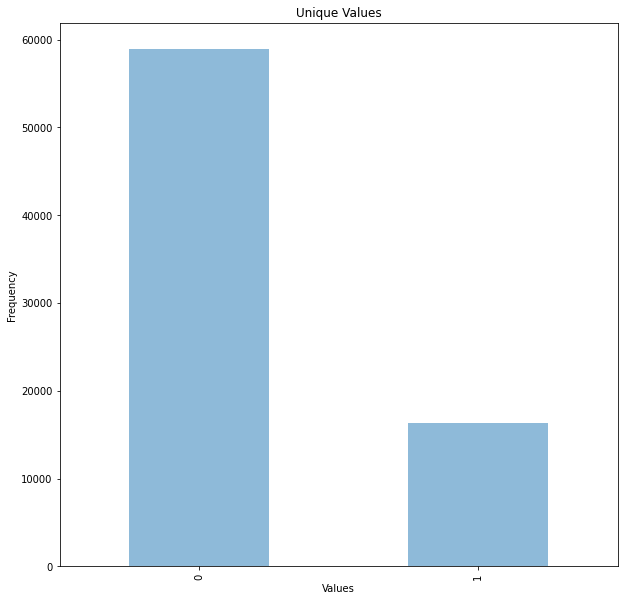

In [ ]:
#Create plot
df.Risk_Description.value_counts().plot(kind='bar',alpha=0.5,figsize=(10,10))
#Set title
plt.title('Unique Values')
#Set x_axis label
plt.xlabel('Values')
#Set y.axis label
plt.ylabel('Frequency')
#Plot the graph
plt.show()

###Features

In [ ]:
#Create a feature df from the columns
features = df.loc[:, df.columns != 'Risk_Description']
features.drop(['customerId','avg_last_10_days', 'avg_last_30_days'], axis=1, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


###Train-Test Split

In [ ]:
#Split test and training data for target object 1
#By default 75% training data and 25% testing data
x_train, x_test, y_train, y_test = train_test_split(features,
                                                    y_target,
                                                    test_size=.25,
                                                    random_state=1)

In [ ]:
#View shape of train and test data sets for both feature and response
print (x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(56504, 59) (18835, 59) (56504,) (18835,)


###Naive Bayes

![picture](https://drive.google.com/uc?export=view&id=1YGK4i2AT0HQxVhBtGoFERTBJP8WG4d_z)

In [ ]:
#Train a Naive Bayes Model on the training set
BNB = BernoulliNB()
BNB.fit(x_train,y_train)
#Make predictions for the testing set using Naive Bayes
BNB_y_pred = BNB.predict(x_test)

####Cross-Validation

In [ ]:
results = cross_valer(BNB, features, y_target, cv = 3)
print("Cross Validation Scores: {results}".format(results = results))

Cross Validation Scores: [0.81607136 0.80165651 0.80814717]


####Model Evaluation

In [ ]:
predictions = BNB.predict(x_test)
actuals = y_test
confusion = confusion_matrix(predictions, actuals)

print("True Positives: {0}".format(confusion[0][0]))
print("False Positives: {0}".format(confusion[0][1]))
print("False Negatives: {0}".format(confusion[1][0]))
print("True Negatives: {0}".format(confusion[1][1]))

print("Accuracy: {0}".format(sum(predictions == actuals) /len(predictions)))
print("Confusion Matrix",confusion)

#bayes_score = accuracy_score(y_test,BNB_y_pred)
#print('Accuracy per LSVC Model: ', LSVC_score)
#print('Accuracy per Naive Bayes Model: ', bayes_score)

True Positives: 13426
False Positives: 2525
False Negatives: 1224
True Negatives: 1660
Accuracy: 0.8009556676400319
Confusion Matrix [[13426  2525]
 [ 1224  1660]]


###K Nearest Neighbors Classifier

![picture](https://drive.google.com/uc?export=view&id=1AFR_iPAEjXs2CoJCYFQIWXKQYHfKA4A7)

In [ ]:
#Train a K Neareest Neighbors Model on the training set
KNN = KNeighborsClassifier()
KNN.fit(x_train,y_train)
#Make preditions for the testing set using K Nearest Neighbors Model
KNN_pred = KNN.predict(x_test)

####Cross-Validation

In [ ]:
results = cross_valer(KNN, features, y_target, cv = 3)
print("Cross Validation Scores: {results}".format(results = results))

Cross Validation Scores: [0.98861148 0.99092104 0.98900968]


####Model Evaluation

In [ ]:
predictions = KNN.predict(x_test)
actuals = y_test
confusion = confusion_matrix(predictions, actuals)

print("True Positives: {0}".format(confusion[0][0]))
print("False Positives: {0}".format(confusion[0][1]))
print("False Negatives: {0}".format(confusion[1][0]))
print("True Negatives: {0}".format(confusion[1][1]))

print("Accuracy: {0}".format(sum(predictions == actuals) /len(predictions)))
print("Confusion Matrix",confusion)
#KNN_score = accuracy_score(y_test,KNN_pred)
#print('Accuracy per KNN Model: ', KNN_score)

True Positives: 14609
False Positives: 121
False Negatives: 41
True Negatives: 4064
Accuracy: 0.9913989912397133
Confusion Matrix [[14609   121]
 [   41  4064]]


##Additional Algorithms

We used a regression model and a binary classification model to complete the requirements of the project; however there are additional algorithms available in Sklearn!

[Scikit-learn algorithm cheat-sheet](https://https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

![picture](https://drive.google.com/uc?export=view&id=1jB-txLzhlLijAUj2lURBF7P9H85jSkjT)

#Closing Remarks

This concludes the code meeting the requirements of the project!

##Thank you!

